## In this activity, we will find the gradient of the logistic loss function and implement gradient descent 

First, let's import the necessary packages.

In [1]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline 

from log_likelihood_helper import *

Next, we'll simulate some 2D data with binary (0/1) labels.  We're generating these from non-overlapping multivariate normal distributions that should be very easily separable for logistic regression.

In [2]:
np.random.seed(12)
n_samples = 500

class_one = np.random.multivariate_normal([5, 10], [[1, .25],[.25, 1]], n_samples)
class_one_labels = np.zeros(n_samples)

class_two = np.random.multivariate_normal([0, 5], [[1, .25],[.25, 1]], n_samples)
class_two_labels = np.ones(n_samples)

features = np.vstack((class_one, class_two))
labels = np.hstack((class_one_labels, class_two_labels))

In [3]:
features

array([[ 5.04335829,  9.20878544],
       [ 5.84981837,  8.76685113],
       [ 5.34440936,  8.46476727],
       ...,
       [ 0.09521698,  3.98865267],
       [ 1.81113387,  3.70072773],
       [-0.09576516,  4.07467902]])

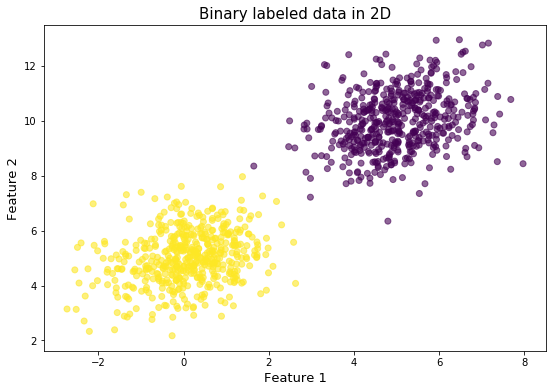

In [5]:
plt.figure(figsize=(9, 6))
plt.scatter(features[:, 0], features[:, 1],
            c = labels, alpha = .6);

plt.title("Binary labeled data in 2D", size=15);
plt.xlabel("Feature 1", size=13);
plt.ylabel("Feature 2", size=13);

In logistic regression, we use gradient ascent to solve for the weight vector that maximizes the (log) likelihood of observing the data.  (Equivalently, we can use gradient _descent_ to solve for the weight vector that _minimizes_ the _negative_ log likelihood - refer to Module 3 if you need a review of this derivation!)

### Fill in the code below to finish implementing the MLE solution for logistic regression (if you need guidance, refer back to the Logistic Regression MLE read page in Module 3.)

In [6]:
def log_likelihood(X, y, w):
    h_x = np.dot(X, w)
    ### BEGIN SOLUTION
    log_likelihood = np.sum(y*h_x - np.log(1 + np.exp(h_x)))
    ### END SOLUTION
    return log_likelihood

Recall that logistic regression makes predictions using this function:

In [7]:
def y_pred(X, w):
    return sigmoid(np.dot(X, w))

### Fill in the sigmoid function to be used in ` y_pred()`

In [12]:
def sigmoid(z):
    ### BEGIN SOLUTION
    sgmd = 1 / (1 + np.exp(-z))
    ### END SOLUTION
    return sgmd

In [13]:
# Autograder test cell - worth 1 point
# runs sigmoid test1
### BEGIN HIDDEN TESTS

n = 10
h = np.random.rand(n)
sgmd1 = sigmoid(h)
sgmd2 = sigmoid_grader(h)
assert (np.linalg.norm(sgmd1 - sgmd2) < 1e-5)

### END HIDDEN TESTS

In [14]:
# Autograder test cell - worth 1 point
# runs sigmoid test2
### BEGIN HIDDEN TESTS

x = np.random.rand(1)
sgmd1 = sigmoid(x)
sgmd2 = sigmoid_grader(x)
assert (np.linalg.norm(sgmd1 - sgmd2) < 1e-5)

### END HIDDEN TESTS

### Now, compute the gradient by taking the derivative of the log likelihood expression with respect to the weight vector.

Hint: you'll use the expressions `h_x` and `y_hat` that are already implemented.

In [15]:
def gradient(X, y, w):
    h_x = np.dot(X, w)
    y_hat = sigmoid(h_x)
    ### BEGIN SOLUTION
    grad = np.dot(X.T, (y - y_hat))
    ### END SOLUTION
    return grad

### Last step: fill in the code below to implement the weight update of gradient ascent.  Hint: use the `y_pred` function above.

Recall that in gradient ascent, the weights are updated by the product of the learning rate alpha, and the gradient of the loss function with respect to the weight vector (which you implemented in the function above).  Pay close attention to the signs - are we adding or subtracting at each weight update step?  Why?

In [16]:
def logistic_regression(X, y, max_iter, alpha):
    _, d = X.shape
    weights = np.zeros(d)
    losses = np.zeros(max_iter)    
    
    for step in range(max_iter):
        ### BEGIN SOLUTION
        grad = gradient(X, y, weights)
        weights += alpha * grad
        losses[step] = log_likelihood(X, y, weights)
        ### END SOLUTION
    return weights, losses

In [17]:
# Autograder test cell - worth 1 point
# runs logistic_regression test1
### BEGIN HIDDEN TESTS
XUnit = np.array([[-1,1],[-1,0],[0,-1],[-1,2],[1,-2],[1,-1],[1,0],[0,1],[1,-2],[-1,2]])
YUnit = np.hstack((np.ones(5), -np.ones(5)))

[lss1,grd1] = logistic_regression(XUnit, YUnit, 30000, 5e-5)
[lss2,grd2] = logistic_regression_grader(XUnit, YUnit, 30000, 5e-5)
assert(np.linalg.norm(lss1 - lss2) < 1e-5)


### END HIDDEN TESTS

In [18]:
# Autograder test cell - worth 1 point
# runs logistic_regression test2
### BEGIN HIDDEN TESTS

X = np.vstack((np.random.randn(50, 5), np.random.randn(50, 5) + 2))
Y = np.hstack((np.ones(50), -np.ones(50)))
max_iter = 300
alpha = 1e-5
weights1, _ = logistic_regression(X, Y, max_iter, alpha)
weights2, _ = logistic_regression_grader(X, Y, max_iter, alpha)
assert (np.linalg.norm(weights1 - weights2) < 1e-5)

### END HIDDEN TESTS

### Now we'll run your implementation on the binary classification data we set up at the top of the notebook.  Check your code by plotting the values of the negative log likelihood - should these values increase or decrease as the number of iterations grows?  Do your values move in the right direction?

You can tune `max_iter` and `alpha` to see how they affect convergence!  

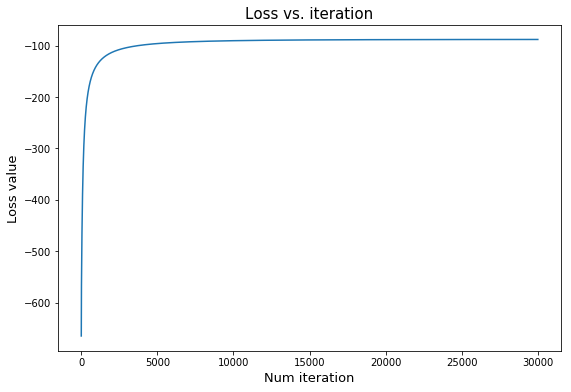

In [19]:
max_iter = 30000
alpha = 1e-5
final_weights, losses = logistic_regression(features, labels, max_iter, alpha)
plt.figure(figsize=(9, 6));
plt.plot(losses);
plt.title("Loss vs. iteration", size=15);
plt.xlabel("Num iteration", size=13);
plt.ylabel("Loss value", size=13);

Below, we'll take the final weights from the logistic solver and predict labels for the entire dataset.  By plotting the results, we can get a sense of where the linear decision boundary lies.  What do you notice?  What could be changed to further improve the accuracy of the classifier? (_Hint: take a look at the second video in Module 1._)

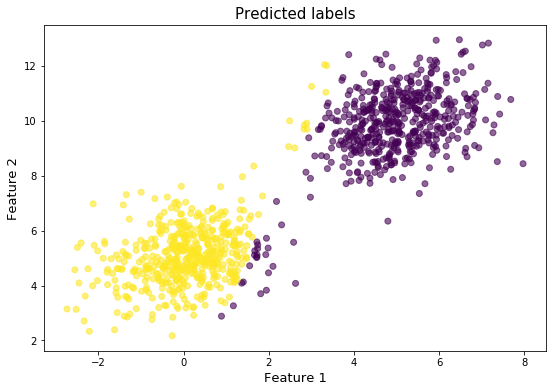

In [20]:
scores = y_pred(features, final_weights)
pred_labels = np.round(scores)
plt.figure(figsize=(9, 6))
plt.scatter(features[:, 0], features[:, 1],
            c = pred_labels, alpha = .6);
plt.title("Predicted labels", size=15);
plt.xlabel("Feature 1", size=13);
plt.ylabel("Feature 2", size=13);